<a href="https://colab.research.google.com/github/Jadrianp29/testreko/blob/main/DS_C7_SC3_JesusAdrianAguilarPerez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actualmente la industria, gobierno y organizaciones tienen la necesidad de generar modelos inteligentes para diversos propósitos. En este caso en particular, ayudarás a proteger al mundo desarrollando el modelo que mejor funcione para integrarlo al sistema de seguridad y poder detectar intrusos y ataques dentro del perímetro de una base que desarrolla una vacuna para curar la plaga zombi que atormenta al mundo.

Trabajarás con una base de datos que contiene 8530 imágenes de diferentes dimensiones de 6 clases diferentes: misil, jet, helicóptero, dron, cohete y avión en formatos jpeg, jpg, png, entre otros. Por lo tanto, tendrás que encargarte de preparar la base de datos de imágenes para poder generar los modelos que se requieren.

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import collections
import random
from collections import Counter
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pathlib
import os
import PIL
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
from PIL import Image
import keras
from PIL import Image, ImageOps
import random as rn

In [2]:
import pathlib

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Preprocesa la base de datos por poder trabajar con ella.

In [4]:
Imagenes=[]
Etiquetas=[]
IMG_TAM = 130

In [5]:
DIR_BASE = '/content/drive/MyDrive/Tensorflow/DS_C7_SC3/Base-de-datos'
DIR_avion = DIR_BASE+'/datos/objetos/avion'
DIR_cohete = DIR_BASE+'/datos/objetos/cohete'
DIR_dron = DIR_BASE+'/datos/objetos/dron'
DIR_helicoptero = DIR_BASE+'/datos/objetos/helicoptero'
DIR_jet = DIR_BASE+'/datos/objetos/jet'
DIR_misil = DIR_BASE+'/datos/objetos/misil'
DIR_BASE = pathlib.Path(DIR_BASE)

Funcion para obtener extensiones

In [6]:
def obtener_extension_archivos(DIR):
  ext=[]
  for archivo in os.listdir(DIR):
    nom_archivo, ext_archivo = os.path.splitext(archivo)
    ext.append(ext_archivo)
  extensiones=set(ext)
  print(extensiones)

In [7]:
obtener_extension_archivos(DIR_avion)
obtener_extension_archivos(DIR_cohete)
obtener_extension_archivos(DIR_dron)
obtener_extension_archivos(DIR_helicoptero)
obtener_extension_archivos(DIR_jet)
obtener_extension_archivos(DIR_misil)

{'.png', '.JPG', '.jpeg', '.jpg'}
{'.JPG', '.jpeg', '.PNG', '.png', '.jpg'}
{'.JPG', '.jpeg', '.PNG', '.png', '.jpg'}
{'.JPG', '.jpeg', '.PNG', '.png', '.jpg'}
{'.JPG', '.jpeg', '.PNG', '.png', '.jpg'}
{'.JPG', '.jpeg', '.PNG', '.png', '.jpg', '.JPEG'}


Funcion para procesar solo imagenes y funcion para generar modelo

In [8]:
def imagen_valida(archivo, extensiones=['jpg', 'png', 'jpeg']):
    nom_archivo, ext_archivo = os.path.splitext(archivo)
    es_archivo = os.path.isfile(archivo)
    ext_archivo = ext_archivo[1:].lower()
    return es_archivo and ext_archivo in extensiones

Construir base de datos

In [9]:
def construir_base_datos(etiqueta, DIR):
  for archivo in tqdm(os.listdir(DIR)):
    ruta = os.path.join(DIR,archivo)
    if imagen_valida(ruta):
      img = tf.keras.preprocessing.image.load_img(ruta,color_mode='rgb')
      matriz_img = tf.keras.preprocessing.image.img_to_array(img)
      matriz_img = tf.image.resize(matriz_img/255,[IMG_TAM,IMG_TAM])
      Imagenes.append(matriz_img.numpy())
      Etiquetas.append(etiqueta)

In [10]:
clases = ['avion','cohete','dron','helicoptero','jet','misil']
construir_base_datos(0,DIR_avion)
print('\n', len(Etiquetas))
construir_base_datos(1,DIR_cohete)
print('\n', len(Etiquetas))
construir_base_datos(2,DIR_dron)
print('\n', len(Etiquetas))
construir_base_datos(3,DIR_helicoptero)
print('\n', len(Etiquetas))
construir_base_datos(4,DIR_jet)
print('\n', len(Etiquetas))
construir_base_datos(5,DIR_misil)
print('\n', len(Etiquetas))


100%|██████████| 1420/1420 [01:06<00:00, 21.38it/s]



 1420


100%|██████████| 1173/1173 [00:50<00:00, 23.36it/s]



 2593


100%|██████████| 1312/1312 [00:55<00:00, 23.54it/s]



 3905


100%|██████████| 1354/1354 [00:55<00:00, 24.31it/s]



 5259


100%|██████████| 1843/1843 [01:17<00:00, 23.69it/s]



 7102


100%|██████████| 1315/1315 [00:48<00:00, 26.92it/s]


 8417


Validando imagenes

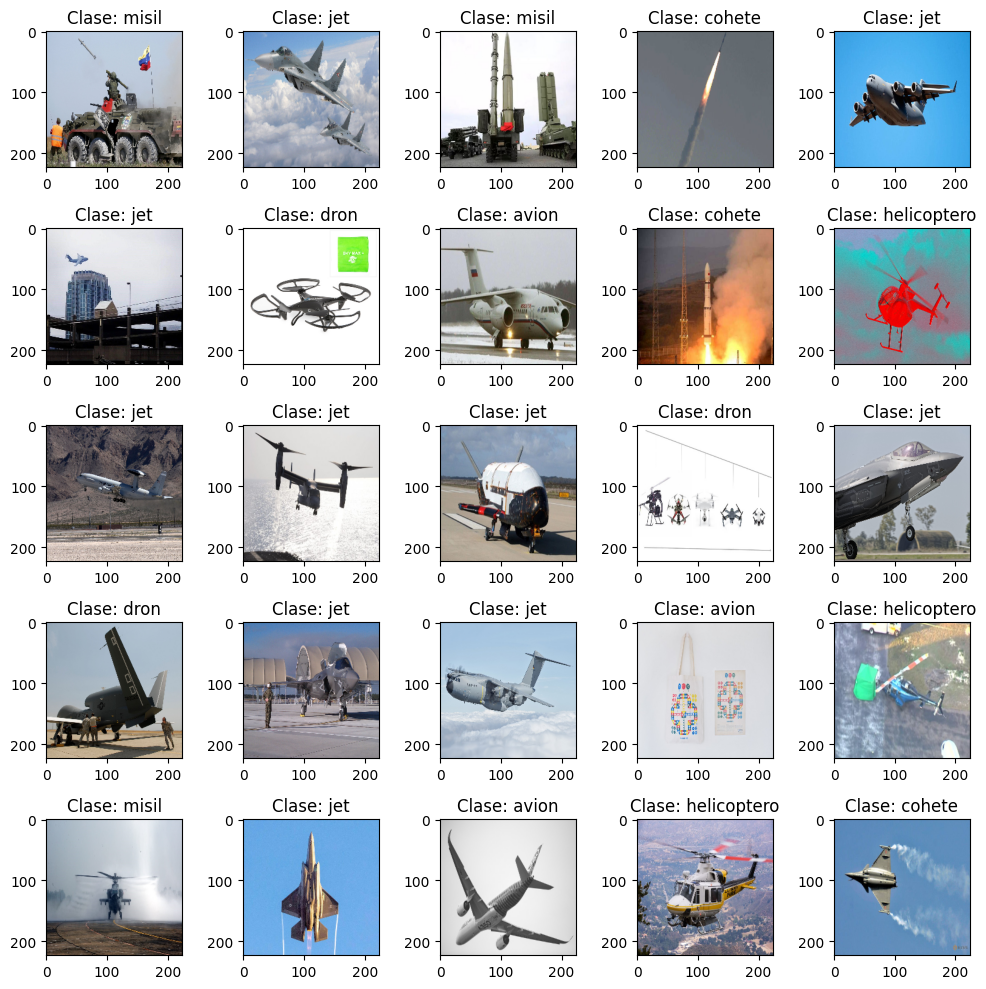

In [11]:
fig,ax = plt.subplots(5, 5)
fig.set_size_inches(10, 10)
for i in range(5):
    for j in range (5):
        l = rn.randint(0, len(Etiquetas))
        ax[i, j].imshow(Imagenes[l])
        ax[i, j].set_title('Clase: ' + clases[Etiquetas[l]])
plt.tight_layout()

Aumentando la base de imagenes - Data Augmentation-

In [12]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 30, # rotación aleatoria de la imágenes en un rango de (0 a 30)
    zoom_range = 0.05, # acercamiento aleatorio dentro de la imagen
    width_shift_range = 0.1, # desplazamiento horizontal aleatorio
    height_shift_range = 0.1, # desplazamiento vertical aleatorio
    horizontal_flip = True, # volteo horizontal de las imágenes
    vertical_flip = True, # volteo vertical de las imágenes
    channel_shift_range = 0.5 #modificación aleatorio de los valores RGB de la imagen
    )

Construyendo conjuntos de entrenamiento y pruebla

In [ ]:
img_entrenamiento,img_prueba,etq_entrenamiento,etq_prueba=train_test_split(Imagenes,Etiquetas,test_size=0.25,random_state=42)
img_entrenamiento=np.array(img_entrenamiento)
img_prueba=np.array(img_prueba)
etq_entrenamiento= np.array(etq_entrenamiento)
etq_prueba = np.array(etq_prueba)

Creando Modelo desde 0

In [ ]:
np.random.seed(40)
rn.seed(40)
tf.random.set_seed(40)

In [ ]:
RedConv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(5,5),activation='relu',padding='Same',        input_shape=(130,130,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='Same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(96,(3,3),activation='relu',padding='Same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='Same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(6,activation='softmax')
])
RedConv.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
evolucion = RedConv.fit(datagen.flow(img_entrenamiento,etq_entrenamiento, batch_size=128),validation_data
=(img_prueba,etq_prueba), epochs=25,batch_size=128)

Visualizando exactitud y perdida

In [ ]:
plt.figure()
plt.plot(evolucion.history['loss'])
plt.plot(evolucion.history['val_loss'])
plt.title('Función de perdida del modelo')
plt.ylabel('Perdida')
plt.xlabel('Epocas')
plt.legend(['entrenamiento', 'prueba'])
plt.show()

In [ ]:
plt.figure()
plt.plot(evolucion.history['accuracy'])
plt.plot(evolucion.history['val_accuracy'])
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('Epocas')
plt.legend(['entrenamiento', 'prueba'])
plt.show()

Modelo preentrenado

In [ ]:
tam_lote= 168
EXTENSIONES_VALIDAS = ('.jpg', '.jpeg', '.png', '.bmp')


In [ ]:
DIR_BASE2 = Path('/content/drive/MyDrive/Tensorflow/DS_C7_SC3/Base-de-datos/datos/objetos')


limpieza de datos dejando solo extensiones compatibles y verificando que la imagen no sea webp

In [ ]:
def es_webp(archivo):
    with open(archivo, 'rb') as file:
        header = file.read(12)
        return header[:4] == b'RIFF' and header[8:] == b'WEBP'

In [ ]:
def eliminar_webp_contenido(DIR):
    for root, _, files in os.walk(DIR):
        for archivo in files:
            ruta = os.path.join(root, archivo)
            if es_webp(ruta):
                try:
                    os.remove(ruta)
                    print(f"Eliminado: {ruta}")
                except Exception as e:
                    print(f"No se pudo eliminar {ruta}: {e}")

In [ ]:
print("Cantidad de archivos el dataset: ",len(list(DIR_BASE2.glob("*/*"))))


In [ ]:
eliminar_webp_contenido(DIR_BASE)

conjuntos de entrenamiento y prueba

In [ ]:
conj_entrenamiento = tf.keras.preprocessing.image_dataset_from_directory(
    DIR_BASE2,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_TAM, IMG_TAM),
    batch_size= tam_lote,
)

In [ ]:
conj_prueba = tf.keras.preprocessing.image_dataset_from_directory(
    DIR_BASE2,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_TAM, IMG_TAM),
    batch_size= tam_lote
)

clases

In [ ]:
nombres_clases=conj_entrenamiento.class_names
print(nombres_clases)


In [ ]:
for lote_img, lote_etq in conj_entrenamiento:
  print(lote_img.shape)
  print(lote_etq.shape)
  break

proceso de captacion

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
conj_entrenamiento = conj_entrenamiento.cache().shuffle( 900).prefetch(buffer_size= AUTOTUNE)
conj_prueba = conj_prueba.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
FORMA_IMG = (130,130,3)
modelo_base = tf.keras.applications.MobileNetV2(
    input_shape=FORMA_IMG,
    include_top=False,
    weights='imagenet'
    )

In [ ]:
modelo_base.trainable = False
modelo_base.summary()

normalizar datos

In [ ]:
capa_normalizacion = capa_normalizacion = tf.keras.layers.Rescaling(1./255, input_shape=FORMA_IMG)
capa_prom_global = tf.keras.layers.GlobalAveragePooling2D()
capa_prediccion = tf.keras.layers.Dense(6,activation='softmax')

modelo final

In [ ]:
modelo_final = tf.keras.Sequential([
capa_normalizacion,
modelo_base,
capa_prom_global,
capa_prediccion
 ])

In [ ]:
modelo_final.summary()

Evaluando

In [ ]:
tasa_aprendizaje_base = 0.0001
modelo_final.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = tasa_aprendizaje_base), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
historial = modelo_final.fit(conj_entrenamiento, epochs = 10,validation_data = conj_prueba,verbose=1)

Visualizando Accuracy y perdida

In [ ]:
exactitud = historial.history['accuracy']
exactitud_val = historial.history['val_accuracy']

perdida = historial.history['loss']
perdida_val = historial.history['val_loss']

rango_epoca = range(15)

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(rango_epoca, exactitud, label='Exactitud entrenamiento')
plt.plot(rango_epoca, exactitud_val, label='Exactitud validación')
plt.legend(loc='lower right')
plt.title('Exactitud')

plt.subplot(1, 2, 2)
plt.plot(rango_epoca, perdida, label='Perdida entrenamiento')
plt.plot(rango_epoca, perdida_val, label='Perdida validación')
plt.legend(loc='upper right')
plt.title('Valor de la función de perdida')
plt.show()

In [ ]:
modelo_final.save("/content/drive/MyDrive/Tensorflow/DS_C7_SC3/Base-de-datos.h5")

modelo con teachable machine

El modelo H5 ya no es soportado por Keras 3.0 por lo que se uso saved model

In [ ]:
# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = keras.layers.TFSMLayer(
    "/content/drive/MyDrive/Tensorflow/DS_C7_SC3/converted_savedmodel/model.savedmodel",
    call_endpoint='serving_default'  # o el endpoint que corresponda
)

# Load the labels
with open("/content/drive/MyDrive/Tensorflow/DS_C7_SC3/converted_savedmodel/labels.txt", "r") as f:
    class_names = [line.strip().split(" ", 1)[1] for line in f.readlines()]


In [ ]:
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = ImageOps.fit(image, (224, 224), Image.Resampling.LANCZOS)
    image_array = np.asarray(image).astype(np.float32)
    normalized_image = (image_array / 127.5) - 1
    return np.expand_dims(normalized_image, axis=0)



In [ ]:
# Procesar todas las imágenes en el directorio
for file_name in os.listdir(DIR_BASE2):
    if file_name.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
        image_path = os.path.join(DIR_BASE2, file_name)
        try:
            data = preprocess_image(image_path)
            prediction = model(data).numpy()
            index = np.argmax(prediction)
            confidence = prediction[0][index]
            class_name = class_names[index]
            print(f"{file_name} → {class_name} ({confidence:.2f})")
        except Exception as e:
            print(f"Error procesando {file_name}: {e}")

In [ ]:
output = model(data)
print("Claves del output:", output.keys())  # para saber qué clave usar


In [ ]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score

y_true = []
y_pred = []

# Contar el total de imágenes para que tqdm tenga una longitud total
total_images = sum(
    len([f for f in os.listdir(os.path.join(DIR_BASE2, d)) if f.endswith((".jpg", ".png"))])
    for d in os.listdir(DIR_BASE2)
    if os.path.isdir(os.path.join(DIR_BASE2, d))
)

with tqdm(total=total_images, desc="Procesando imágenes") as pbar:
    # Recorremos las carpetas (una por clase)
    for class_name in os.listdir(DIR_BASE2):
        class_dir = os.path.join(DIR_BASE2, class_name)
        if not os.path.isdir(class_dir):
            continue  # saltar archivos

        if class_name not in class_names:
            print(f"⚠️ Clase '{class_name}' no está en class_names. Saltando.")
            continue

        label_index = class_names.index(class_name)

        for file_name in os.listdir(class_dir):
            if file_name.endswith((".jpg", ".png")):
                image_path = os.path.join(class_dir, file_name)

                # Preprocesamiento e inferencia
                data = preprocess_image(image_path)
                output = model(data)
                prediction = output["sequential_5"].numpy()
                predicted_index = np.argmax(prediction)

                y_true.append(label_index)
                y_pred.append(predicted_index)

                pbar.update(1)

# Calcular accuracy
acc = accuracy_score(y_true, y_pred)
print("✅ Accuracy:", acc)

CONCLUSIONES
